# 1. Understanding the Data

Import Libraries¶


In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read loan_data file 

In [372]:
## ================================================
#    Read and explore the data
# =================================================
df = pd.read_csv('loan_data.csv')


In [373]:
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.119,829.100,11.350,19.480,737,"5,639.958",28854,52.100,0,0,0,0
1,1,credit_card,0.107,228.220,11.082,14.290,707,"2,760.000",33623,76.700,0,0,0,0
2,1,debt_consolidation,0.136,366.860,10.373,11.630,682,"4,710.000",3511,25.600,1,0,0,0
3,1,debt_consolidation,0.101,162.340,11.350,8.100,712,"2,699.958",33667,73.200,1,0,0,0
4,1,credit_card,0.143,102.920,11.300,14.970,667,"4,066.000",4740,39.500,0,1,0,0


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [375]:
df.shape

(9578, 14)

In [376]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,"9,578.000","9,578.000","9,578.000","9,578.000","9,578.000","9,578.000","9,578.000","9,578.000","9,578.000","9,578.000","9,578.000","9,578.000","9,578.000"
mean,0.805,0.123,319.089,10.932,12.607,710.846,"4,560.767","16,913.964",46.799,1.577,0.164,0.062,0.160
std,0.396,0.027,207.071,0.615,6.884,37.971,"2,496.930","33,756.190",29.014,2.200,0.546,0.262,0.367
min,0.000,0.060,15.670,7.548,0.000,612.000,178.958,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,0.104,163.770,10.558,7.213,682.000,"2,820.000","3,187.000",22.600,0.000,0.000,0.000,0.000
50%,1.000,0.122,268.950,10.929,12.665,707.000,"4,139.958","8,596.000",46.300,1.000,0.000,0.000,0.000
75%,1.000,0.141,432.762,11.291,17.950,737.000,"5,730.000","18,249.500",70.900,2.000,0.000,0.000,0.000
max,1.000,0.216,940.140,14.528,29.960,827.000,"17,639.958","1,207,359.000",119.000,33.000,13.000,5.000,1.000


In [377]:
df.dtypes.value_counts()

int64      7
float64    6
object     1
dtype: int64

In [378]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

# 2. Data Analysis

1. Analyse the categorical features of Data  sets
2. Visualize the spread of the data
3. Encoding


In [379]:
cat_features = df.select_dtypes(include=['object']).columns.to_list()

In [380]:
cat_features

['purpose']

In [381]:
cat_df = df.loc[:, cat_features]

In [382]:
num_features = [i for i in df.columns if i not in cat_features]

In [383]:
cat_df = df.loc[:, cat_features]

In [384]:
cat_df['credit.policy'] = df['credit.policy']

In [385]:
cat_df

,purpose,credit.policy
0,debt_consolidation,1
1,credit_card,1
2,debt_consolidation,1
3,debt_consolidation,1
4,credit_card,1
...,...,...
9573,all_other,0
9574,all_other,0
9575,debt_consolidation,0
9576,home_improvement,0


In [386]:
for i in cat_df.columns:
    if i != 'credit.policy':
        print(i.upper())
        print(cat_df[i].value_counts(), '\n')

PURPOSE
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64 



In [387]:
def cat_plots(df):
    for i in cat_features:
        plt.figure(figsize=(20,5))
        sns.countplot(df[i])
        plt.xticks(rotation=90)
        plt.show()

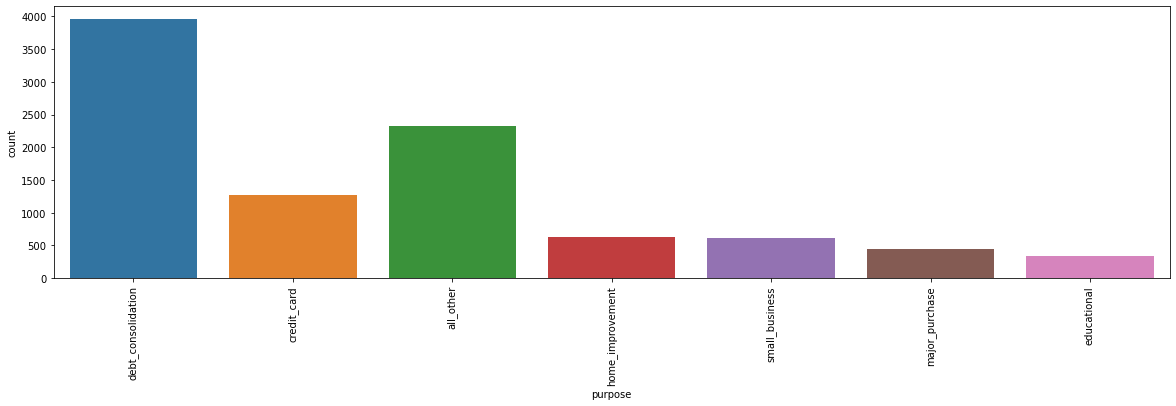

In [388]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

cat_plots(df)

In [389]:
# Checking for missing data
# ------------------------
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<AxesSubplot:>

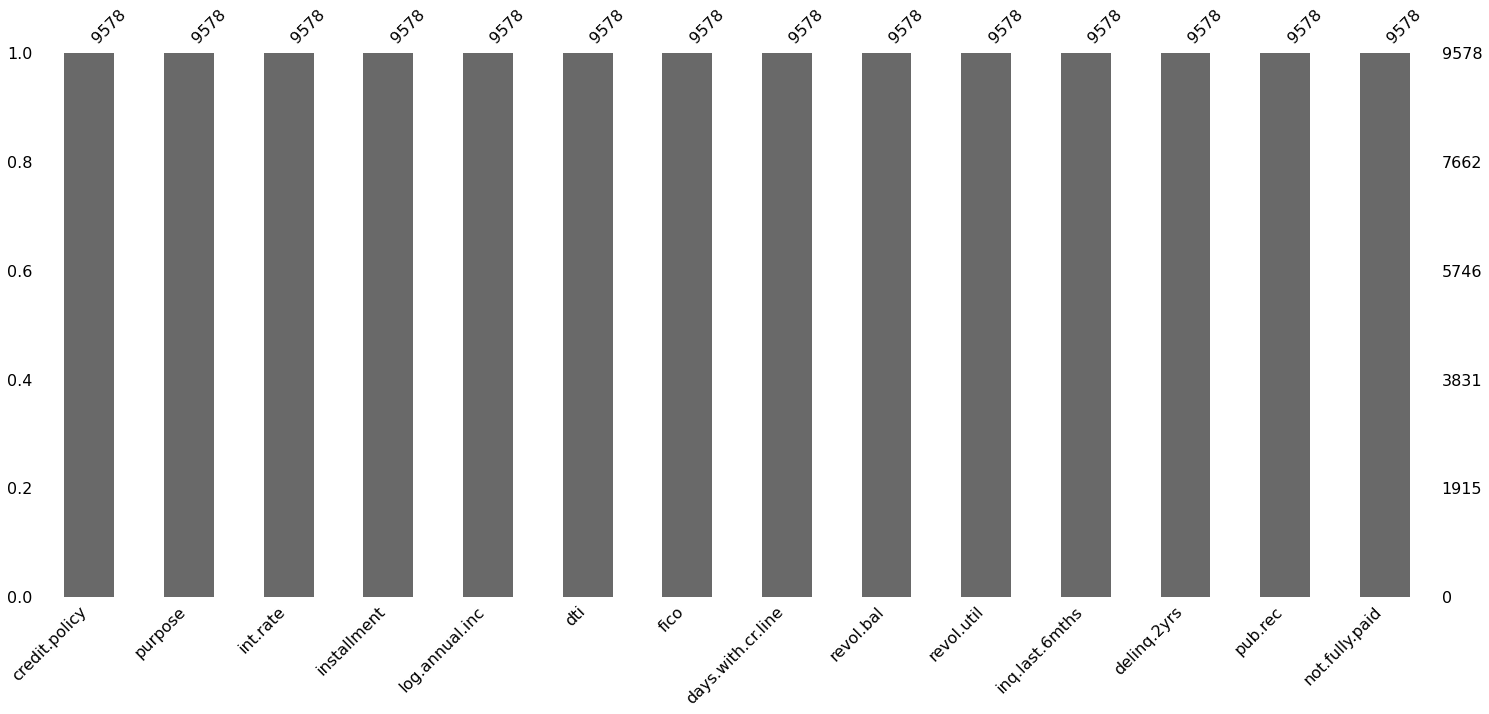

In [390]:
# for checking null values
# Visualize missing values (NaN) values using Missingno Library
import missingno as msno
msno.bar(df) 
# there is no NaN Values from the below graph

<AxesSubplot:>

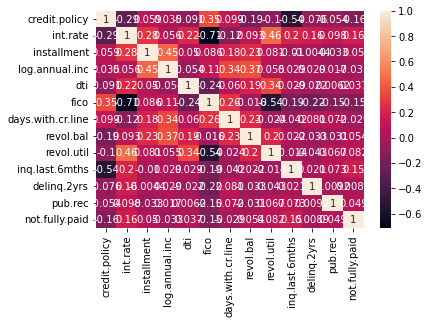

In [391]:
# finding the correlations between the variables and displaying it
corr = df.corr()
sns.heatmap(corr, annot=True)


In [392]:
## =======================================================
#.     Importing Necessary Tools For the project
## =======================================================

import pandas as pd; import numpy as np
from sklearn.metrics import accuracy_score,  roc_auc_score
from sklearn.model_selection import train_test_split

# Import models that make the ensemble 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier

# Import Preprocessing tools
from sklearn.preprocessing import StandardScaler

# Import VotingClassifier
from sklearn.ensemble import VotingClassifier

In [393]:

list = ['credit.policy']
X = df.drop(list, axis=1)
y = df['credit.policy'].values

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y,
                                    test_size= 0.3,
                                    random_state= 1)

In [394]:
X.head()

,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,debt_consolidation,0.119,829.100,11.350,19.480,737,"5,639.958",28854,52.100,0,0,0,0
1,credit_card,0.107,228.220,11.082,14.290,707,"2,760.000",33623,76.700,0,0,0,0
2,debt_consolidation,0.136,366.860,10.373,11.630,682,"4,710.000",3511,25.600,1,0,0,0
3,debt_consolidation,0.101,162.340,11.350,8.100,712,"2,699.958",33667,73.200,1,0,0,0
4,credit_card,0.143,102.920,11.300,14.970,667,"4,066.000",4740,39.500,0,1,0,0


In [395]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

In [396]:
def encoder(train, test):
    le = LabelEncoder()
    for col in train.columns:
        if train[col].dtypes == 'object':
            train[col] = le.fit_transform(train[col])
            le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
            test[col] = test[col].apply(lambda x: le_dict.get(x, -1))
    return train, test

In [397]:
train_encoded, test_encoded = encoder(X_train, X_test)

C:\Users\user\AppData\Local\Temp/ipykernel_45500/3921136942.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp/ipykernel_45500/3921136942.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [398]:
train_encoded

,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
8673,0,0.132,60.860,10.348,10.850,652,"1,169.958",162,54.000,1,0,0,0
4496,2,0.150,110.870,10.960,20.430,672,"5,130.000",6552,95.400,1,1,0,0
7659,2,0.102,153.830,11.280,20.420,712,"6,990.000",61140,60.500,0,0,1,0
8836,2,0.134,541.890,11.051,16.690,702,"4,709.958",19516,68.000,6,0,0,1
2198,0,0.093,51.120,10.342,19.210,727,"4,620.042",714,10.100,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,2,0.125,133.870,11.314,20.910,702,"4,590.000",36462,81.000,1,0,0,0
7813,1,0.122,499.450,11.329,17.020,712,"4,320.000",37570,59.500,5,0,0,0
905,2,0.126,402.080,10.825,10.120,672,"8,864.958",16083,70.200,0,0,1,0
5192,6,0.157,629.750,11.082,9.160,732,"4,200.000",13381,49.400,1,0,0,0


In [399]:
final_train = train_encoded.copy()
final_test = test_encoded.copy()

In [400]:
# Scaling the data
# ---------------

scaler=StandardScaler()

X_train = scaler.fit_transform(final_train)

X_test = scaler.transform(final_test)

In [401]:
# Instantiate logreg
logreg = LogisticRegression(random_state=1)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf= 0.13, 
                            random_state=1)

# Define the list classifiers
classifiers = [('Logistic Regression', logreg), 
               ('K Nearest Neighbours', knn), 
               ('Classification Tree', dt)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:20}: {:.3f}'.format(clf_name,  accuracy))

Logistic Regression : 0.910
K Nearest Neighbours: 0.886
Classification Tree : 0.900


In [402]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.914


In [403]:
accuracies = {'Model': ['LogisticRegression','K Nearest Neighbours','Classification Tree','Voting Classifie'],
     'accuracy' : [logreg.score(X_test,y_test),knn.score(X_test,y_test),dt.score(X_test,y_test),vc.score(X_test,y_test)]}

result = pd.DataFrame(data = accuracies)
result

,Model,accuracy
0,LogisticRegression,0.910
1,K Nearest Neighbours,0.886
2,Classification Tree,0.900
3,Voting Classifie,0.914


<AxesSubplot:title={'center':' loan  Prediction Accuracy'}, xlabel='Model'>

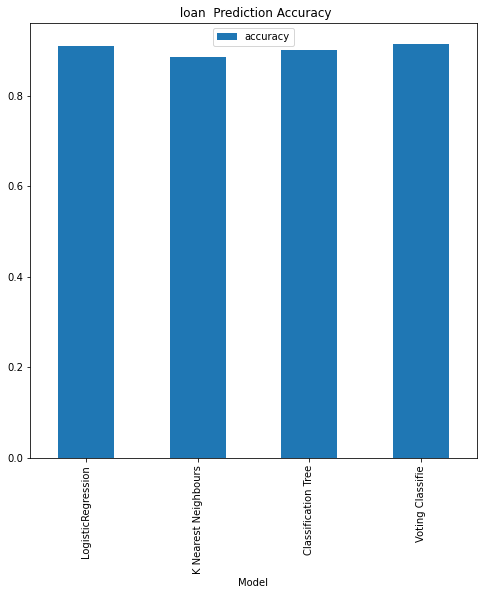

In [404]:
result.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), title=' loan  Prediction Accuracy', 
               sort_columns=True)

In [405]:
import numpy as np
import pandas as pd
y_pred = pd.DataFrame(y_pred, columns=['predictions']).to_csv('prediction.csv')

In [406]:
## ======================================================================
#            Importing the necessary modules and tools
## ======================================================================

import pandas as pd; import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# from sklearn.metrics import necessary metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score , accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Preprocessing tools
from sklearn.preprocessing import MinMaxScaler


# Set notebook options
# --------------------
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline

In [407]:
## ================================================================
#      Training Gradient Boosting Regressor
## ================================================================

# Instantiate gb
# --------------
gb = GradientBoostingRegressor(max_depth=1, 
                              n_estimators= 300,
                              random_state=1)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)
print('Test set MSE of gb: {:.3f}'.format(mse_test))
# Compute RMSE
rmse_test = mse_test**0.5

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set MSE of gb: 0.033
Test set RMSE of gb: 0.182


In [408]:
gbm_model = GradientBoostingClassifier() 
gbm_model.fit(X_train, y_train)


y_pred_gbm = gbm_model.predict(X_test)

print(classification_report(y_test, y_pred_gbm))


conf_matrix = confusion_matrix(y_test, y_pred_gbm)
#plot_confusion_matrix(conf_matrix, classes=[0,1])

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       534
           1       0.99      1.00      1.00      2340

    accuracy                           0.99      2874
   macro avg       0.99      0.98      0.99      2874
weighted avg       0.99      0.99      0.99      2874



In [409]:
print("*"*40)
print("The GBM Accuracy score: {:0.4f}".format(accuracy_score(y_test, y_pred_gbm)))
print("The GBM Area Under ROC: {:0.4f}".format(roc_auc_score(y_test, y_pred_gbm)))
print("*"*40)

****************************************
The GBM Accuracy score: 0.9927
The GBM Area Under ROC: 0.9847
****************************************


In [410]:
## ==================================================
#.      Fitting Gradient Boosting Classifier with 
#.      preset parameters
## ==================================================

# Instantiate gb_clf
# ------------------

gb_clf = GradientBoostingClassifier(max_depth=3, 
                                   n_estimators= 300,
                                   random_state=1)

gb_clf.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
# ---------------------------------------------------------
y_pred_proba = gb_clf.predict_proba(X_test)[:, 1]

y_pred_gb_clf = gb_clf.predict(X_test)
# Evaluate test-set roc_auc_score
# --------------------------------
gb_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
#--------------------

print("*"*40)
print("The GBM Accuracy score: {:0.4f}".format(accuracy_score(y_test, y_pred_gb_clf)))
print("The GBM Area Under ROC: {:0.4f}".format(gb_roc_auc))
print("*"*40)

****************************************
The GBM Accuracy score: 0.9944
The GBM Area Under ROC: 0.9987
****************************************


In [411]:
## =========================================================
#.      Gradient Boosting Classifier Hyperparameter Tuning 
#.      using GridSearch CV
## =========================================================

# Import GridsearchCV
# -------------------
from sklearn.model_selection import GridSearchCV

# Create a dictionary of the grid
# -----------------------------
gbm_grid = {
    "n_estimators":[100,150,200],
    "learning_rate": [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
    "max_depth":[3, 5, 8],
    "max_features":["log2","sqrt"],
    }

# Instantiate the grid search CV
# ------------------------------
grid_gb = GridSearchCV(
            estimator=GradientBoostingClassifier(random_state=1),
            param_grid= gbm_grid,
            cv=5, 
            n_jobs=8,
            verbose = 1) 

In [412]:
# Fit the grid seach object to the training data
# ---------------------------------------------
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=8,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9,
                                           1],
                         'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [413]:
# Print the best parameters
# -------------------------
print("*"*40)
for hyper_name, val in grid_gb.best_params_.items():
    print("{0:18}: {1}".format(hyper_name, val))

# print the best score
# ---------------------
print("*"*40)
print('The best achieved score: {:.5f}'.format(grid_gb.best_score_))
print("*"*40)

****************************************
learning_rate     : 0.3
max_depth         : 5
max_features      : log2
n_estimators      : 200
****************************************
The best achieved score: 0.99075
****************************************


In [414]:
# Train the best classifier
# --------------------------
best_clf = GradientBoostingClassifier(
              random_state=1,
              learning_rate=0.7, 
              max_depth=3,
              max_features='sqrt', 
              n_estimators=100)
# Fit the best classifier
# ------------------------
best_clf.fit(X_train, y_train)

# Make predictions
# ----------------

best_preds = best_clf.predict(X_test)

print("The Gradient Boosting Classification report".center(60))
print("*"*60)
print(classification_report(y_test, best_preds))
print("*"*60)

        The Gradient Boosting Classification report         
************************************************************
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       534
           1       0.99      1.00      1.00      2340

    accuracy                           0.99      2874
   macro avg       0.99      0.99      0.99      2874
weighted avg       0.99      0.99      0.99      2874

************************************************************


In [415]:
accuracies = {'Model': ['LogisticRegression','K Nearest Neighbours','Classification Tree','Voting Classifie','Gradient Boosting Regressor'],
     'accuracy' : [logreg.score(X_test,y_test),knn.score(X_test,y_test),dt.score(X_test,y_test),vc.score(X_test,y_test),gb.score(X_test,y_test)]}

result = pd.DataFrame(data = accuracies)
result

,Model,accuracy
0,LogisticRegression,0.910
1,K Nearest Neighbours,0.886
2,Classification Tree,0.900
3,Voting Classifie,0.914
4,Gradient Boosting Regressor,0.781
